In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
sns.set_style("whitegrid")
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(12,9)
plt.rcParams['figure.facecolor']= '#e8f4ea'

In [52]:
WHI_df=pd.read_csv("world-happiness-report-2021 copy.csv")
WHI_df.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


# Data checking and cleaning

In [53]:
#Check for NaNs
WHI_df.isnull().values.any()

False

In [54]:
#remove irrelevant columns
WHI_df.drop(WHI_df.columns[[3,4,5,12,13,14,15,16,17,18,19]], axis=1,inplace=True)

In [55]:
#rename columns
cols=['CountryName','Region','WHScore','LogGDP','SocialSupp','LifeExp','FreedomLife','Generosity','CorruptionP']
WHI_df.columns=cols

In [56]:
WHI_df.describe()

,WHScore,LogGDP,SocialSupp,LifeExp,FreedomLife,Generosity,CorruptionP
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


# Relationship between all Variables

<AxesSubplot:>

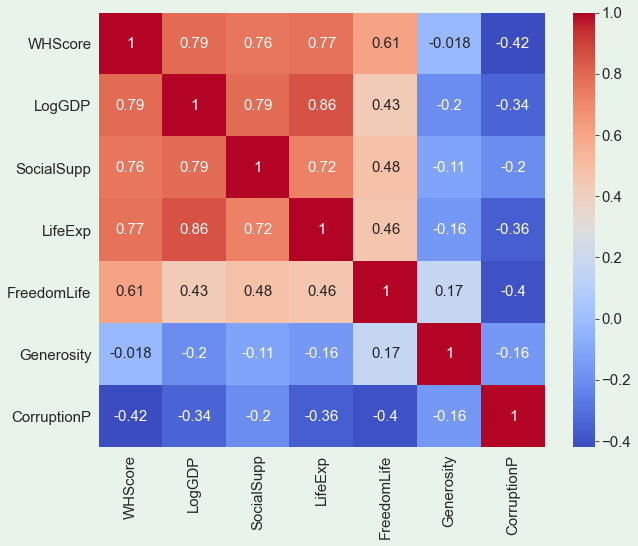

In [60]:
plt.figure(figsize=(10,8))
#create a heatmap of correlations
sns.heatmap(WHI_df.corr(), cmap='coolwarm', annot=True)

#GDP and Life Expectancy appears to have a strong corelation with the Happiness Index

# Relation between Happiness Index and GDP by Region

Text(0, 0.5, 'GDP')

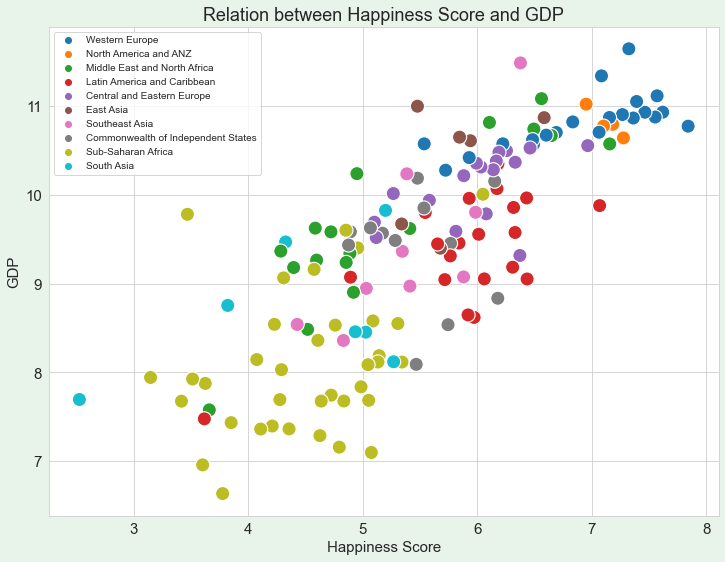

In [57]:
#Plot relation between GDP and Happiness
plt.title('Relation between Happiness Score and GDP')
sns.scatterplot(x=WHI_df.WHScore,y=WHI_df.LogGDP,hue=WHI_df.Region,s=200)
plt.legend(loc='upper left',fontsize=10)
plt.xlabel('Happiness Score')
plt.ylabel('GDP')

In [107]:
RegionGDP=WHI_df.groupby('Region',as_index=False)['LogGDP'].mean()
RegionGDP

,Region,LogGDP
0,Central and Eastern Europe,10.109059
1,Commonwealth of Independent States,9.401833
2,East Asia,10.367667
3,Latin America and Caribbean,9.370000
4,Middle East and North Africa,9.666118
5,North America and ANZ,10.809500
6,South Asia,8.682571
7,Southeast Asia,9.421444
8,Sub-Saharan Africa,8.075194
9,Western Europe,10.822714


<ipython-input-108-ac3ed5d047b1>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=30,ha='right')


<BarContainer object of 10 artists>

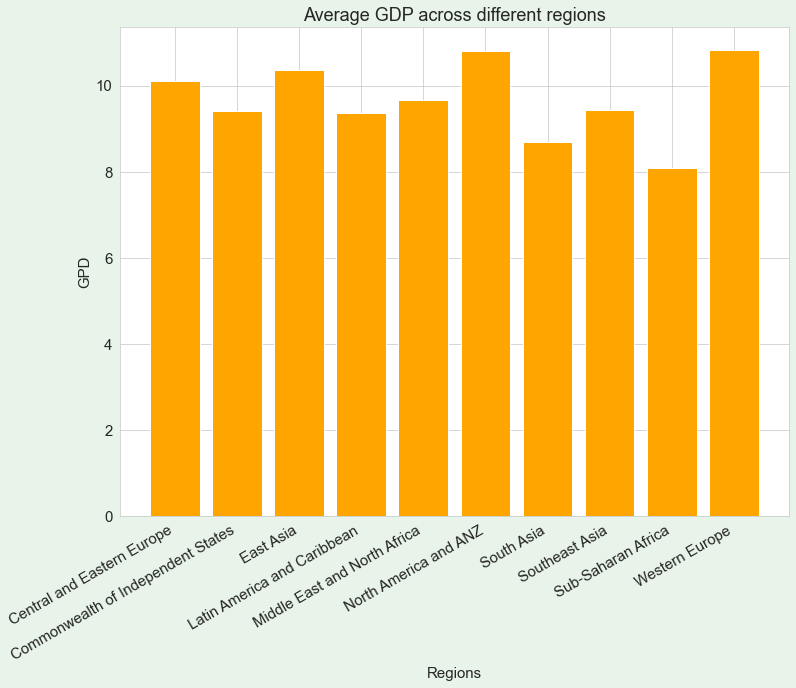

In [108]:
#Avg Happiness by region

plt.title('Average GDP across different regions')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('GDP',fontsize=15)
plt.xticks(Rotation=30,ha='right')
plt.bar(RegionGDP.Region,RegionHappiness.LogGDP,color='orange')

# Comparing life expectancy between the top 10 and bottom 10 happiest countries

In [92]:
top10=WHI_df.head(10)
bottom10=WHI_df.tail(10)
bottom10

,CountryName,Region,WHScore,LogGDP,SocialSupp,LifeExp,FreedomLife,Generosity,CorruptionP
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
141,Tanzania,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


<ipython-input-94-a345d52807ae>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=30,ha='right')
<ipython-input-94-a345d52807ae>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=30,ha='right')


Text(599.1068181818181, 0.5, 'Life Expectancy')

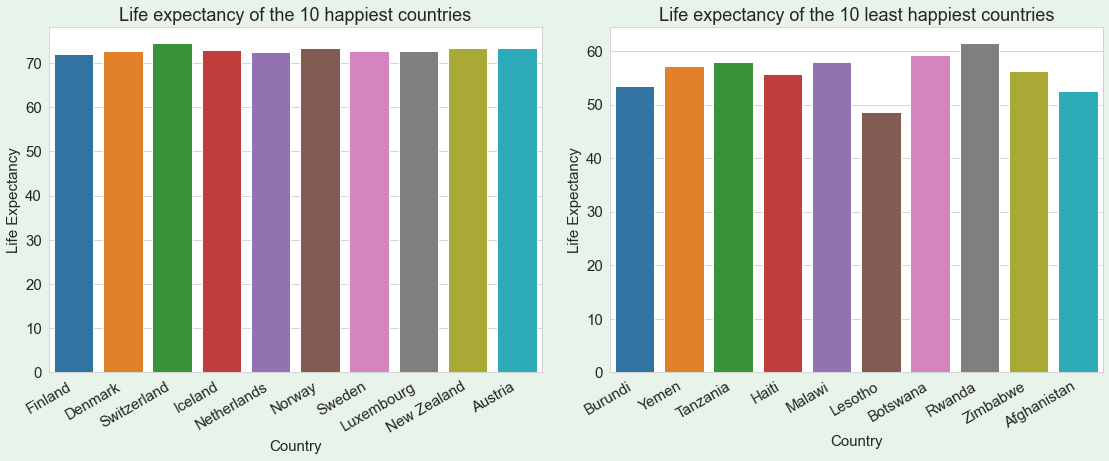

In [94]:
fig, axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top10.CountryName
axes[0].set_title("Life expectancy of the 10 happiest countries")
axes[0].set_xticklabels(xlabels,rotation=30,ha='right')
sns.barplot(x=top10.CountryName,y=top10.LifeExp,ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Life Expectancy')

xlabels=bottom10.CountryName
axes[1].set_title("Life expectancy of the 10 least happiest countries")
axes[1].set_xticklabels(xlabels,rotation=30,ha='right')
sns.barplot(x=bottom10.CountryName,y=bottom10.LifeExp,ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Life Expectancy')

In [103]:
LifeExpectancy=WHI_df.groupby('Region',as_index=False)['LifeExp'].mean()
LifeExpectancy

,Region,LifeExp
0,Central and Eastern Europe,68.338412
1,Commonwealth of Independent States,65.009500
2,East Asia,71.252167
3,Latin America and Caribbean,67.076050
4,Middle East and North Africa,65.609118
5,North America and ANZ,72.325000
6,South Asia,62.681000
7,Southeast Asia,64.888444
8,Sub-Saharan Africa,55.886472
9,Western Europe,73.033095


<ipython-input-104-48d0cfd193ab>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=30,ha='right')


<BarContainer object of 10 artists>

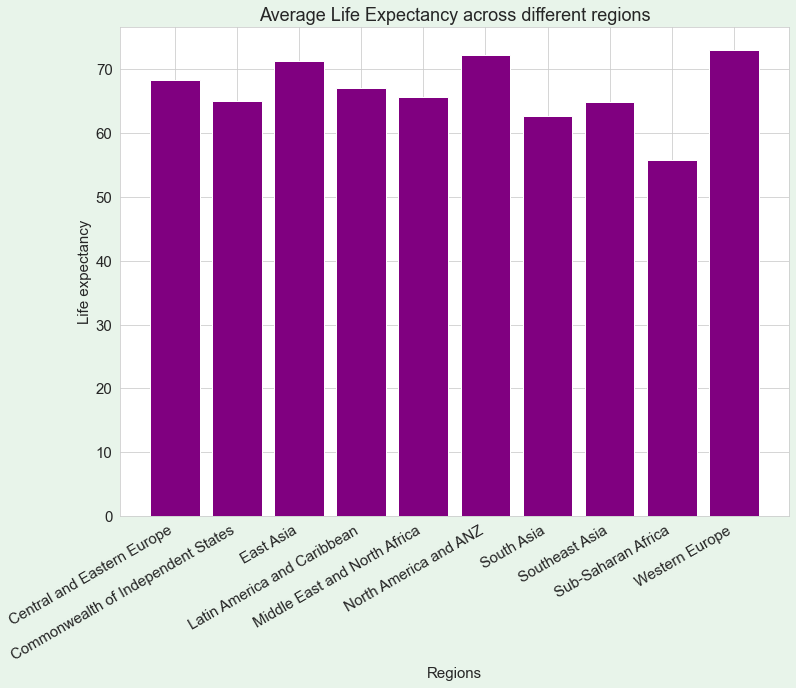

In [104]:
plt.title('Average Life Expectancy across different regions')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Life expectancy',fontsize=15)
plt.xticks(Rotation=30,ha='right')
plt.bar(LifeExpectancy.Region,LifeExpectancy.LifeExp,color='purple')